# Intro to NN

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## Basic operations

![Simple Neuron](simple-neuron.png)

In [3]:
x1 = torch.tensor([0.1, 0.2], requires_grad=True)
x2 = torch.tensor([0.1, 0.1], requires_grad=True)
y = 3 * x1 + x2 + 1
output = y.mean()

In [4]:
output.backward()
print(x1.grad, x2.grad)
output.backward()
print(x1.grad, x2.grad)
output.backward()
print(x1.grad, x2.grad)

tensor([ 1.5000,  1.5000]) tensor([ 0.5000,  0.5000])
tensor([ 3.,  3.]) tensor([ 1.,  1.])
tensor([ 4.5000,  4.5000]) tensor([ 1.5000,  1.5000])


In [5]:
x1.grad.data.zero_()

tensor([ 0.,  0.])

In [6]:
output.backward()
print(x1.grad, x2.grad)

tensor([ 1.5000,  1.5000]) tensor([ 2.,  2.])


In [7]:
x1 = torch.tensor([0.1, 0.2], requires_grad=True)
x2 = torch.tensor([0.1, 0.1], requires_grad=True)
y = 3 * x1 + x2 + 1
z = y.mean()
z = F.sigmoid(y)
output = z.mean()
output

tensor(0.8239)

In [8]:
output.backward()
print(x1.grad)

tensor([ 0.2380,  0.1959])


In [9]:
x = torch.tensor([3], requires_grad=True)
y = x**2
z = 2*y

In [10]:
z.backward()

In [11]:
x.grad

tensor([ 12])

## Boston dataset

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [13]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [14]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

We take two columns:
* per capita crime rate by town
* % lower status of the population

In [15]:
X = boston.data[:, [0, 12]]
medval = boston.target

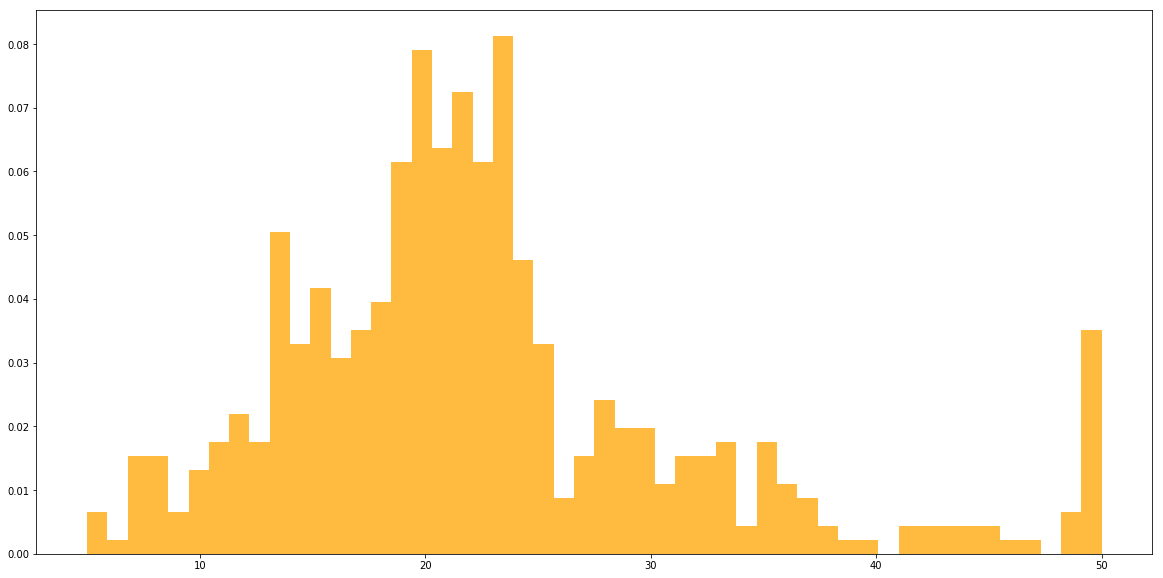

In [23]:
n, bins, patches = plt.hist(medval, 50, normed=1, facecolor='orange', alpha=0.75)

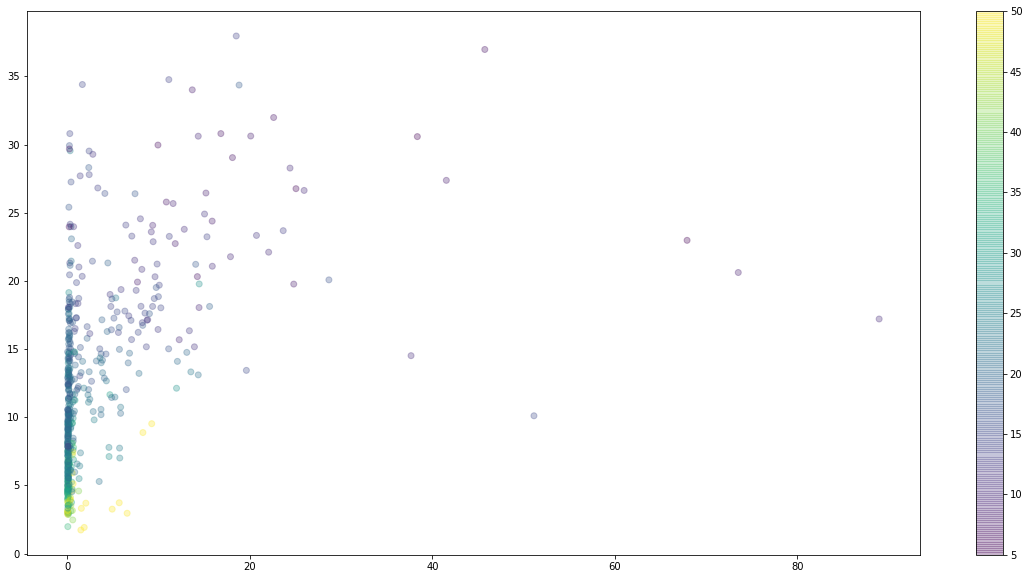

In [24]:
s = plt.scatter(X[:,0], X[:,1], c=medval, alpha=0.3)
plt.colorbar(s)

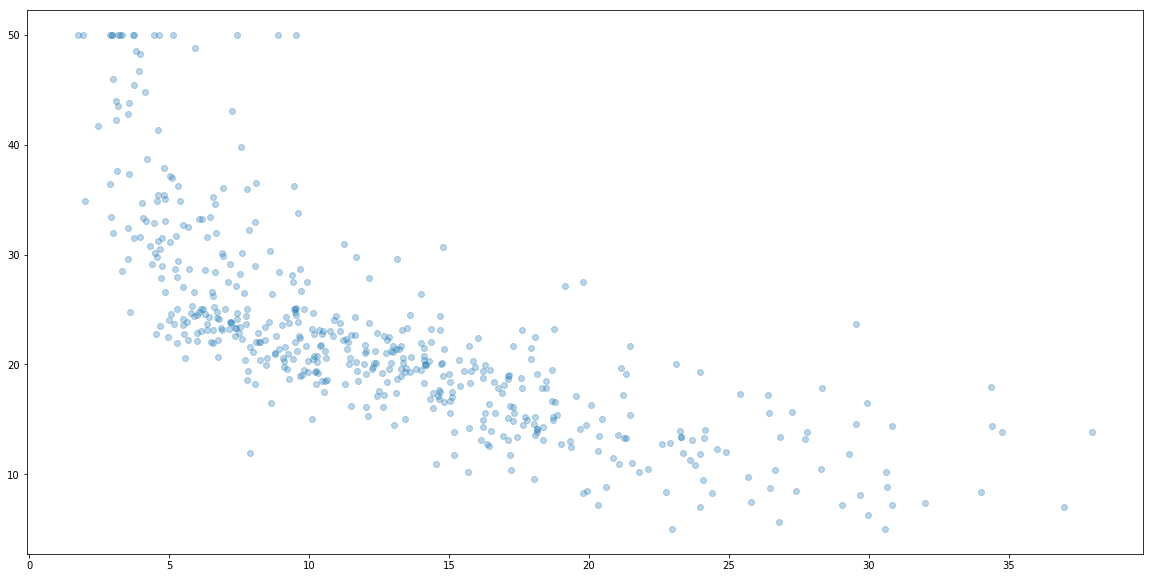

In [25]:
plt.scatter(X[:,1], medval, alpha=0.3)

## Regresion

In [26]:
y = medval

In [27]:
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['medval'] = y
df.head()

,CRIM,LSTAT,medval
0,0.00632,4.98,24.0
1,0.02731,9.14,21.6
2,0.02729,4.03,34.7
3,0.03237,2.94,33.4
4,0.06905,5.33,36.2


In [28]:
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y).float()

In [29]:
model = nn.Linear(in_features=2, out_features=1, bias=True)

In [30]:
model.weight

Parameter containing:
tensor([[ 0.6271,  0.6983]])

In [31]:
model.bias

Parameter containing:
tensor([-0.3025])

In [32]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [33]:
optimizer.zero_grad()
output = model(X_torch)
output[:5, 0]

tensor([ 3.1791,  6.0973,  2.5288,  1.7708,  3.4628])

In [34]:
loss = criterion(output, y_torch.unsqueeze(1))
loss.backward()
model.weight.grad

tensor([[ 107.6811,  -94.6979]])

In [35]:
optimizer.step()
model.weight

Parameter containing:
tensor([[-10.1410,  10.1681]])

## Logistic Regression

In [36]:
y = medval > 25
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['expensive'] = y
df.head()

,CRIM,LSTAT,expensive
0,0.00632,4.98,False
1,0.02731,9.14,False
2,0.02729,4.03,True
3,0.03237,2.94,True
4,0.06905,5.33,True


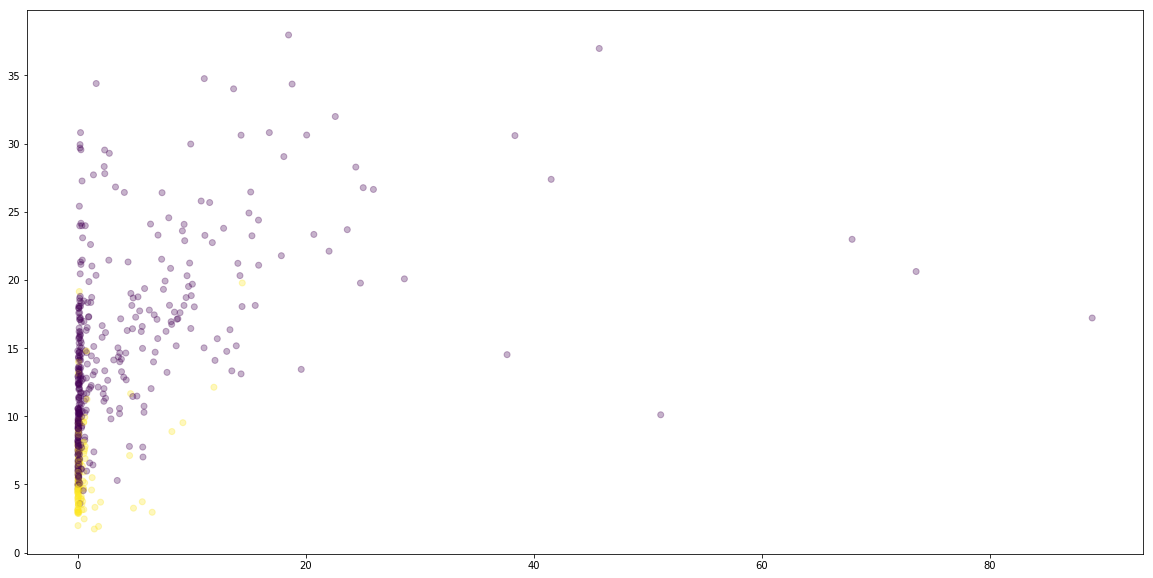

In [37]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
#plt.xlim(0, 2)

## Logistic regression: the simples NN

In [38]:
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y.astype(float)).float()

In [39]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc', nn.Linear(in_features=2, out_features=1, bias=True)),
                      ('sigmoid', nn.Sigmoid())]))

In [40]:
model.fc.weight

Parameter containing:
tensor([[ 0.2637, -0.0500]])

In [41]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [42]:
optimizer.zero_grad()

In [43]:
output = model.forward(X_torch[:32, :])

In [44]:
loss = criterion(output, y_torch[:32].unsqueeze(1))
loss.backward()
model.fc.weight.grad

tensor([[ 0.2993,  5.6799]])

In [45]:
optimizer.step()

In [46]:
model.fc.weight

Parameter containing:
tensor([[ 0.2338, -0.6180]])